# <center> <font color=gray>Compte Rendu N°2</font></center>
### Réaliser par Mohamed amine Sekmani 3DNI2

## 1/Travail à faire:
#### observer la différence entre image bruité est image original après appliquer une clusterring, enfin observer la dfférence entre image filtrer est image original et l'image bruité après appliquer une clusterring 

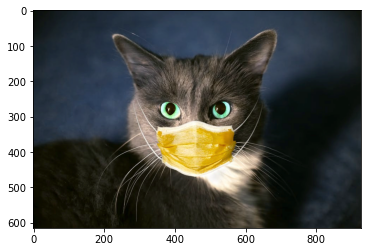

In [26]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('pictures/coronacat.jpg')
(h1, w1) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 2)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imwrite('pictures/coronacat2.jpg', quant)
plt.imshow(image)

cv2.imread('pictures/coronacat.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

chaque fois on augmente le nombre de cluster, on approche chaque fois a la photo initial, on a choisit pour le premier essai un nombre de cluster égale a 2 est on a obtient 2 zone de couleur par contre  la photo initial contient plusieur nuage de couleur.

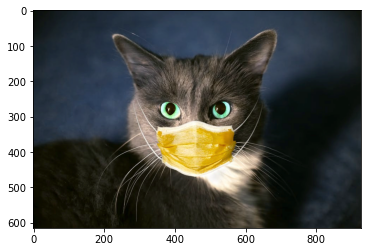

In [11]:
plt.imshow(image)

In [12]:
!pip install opencv-python

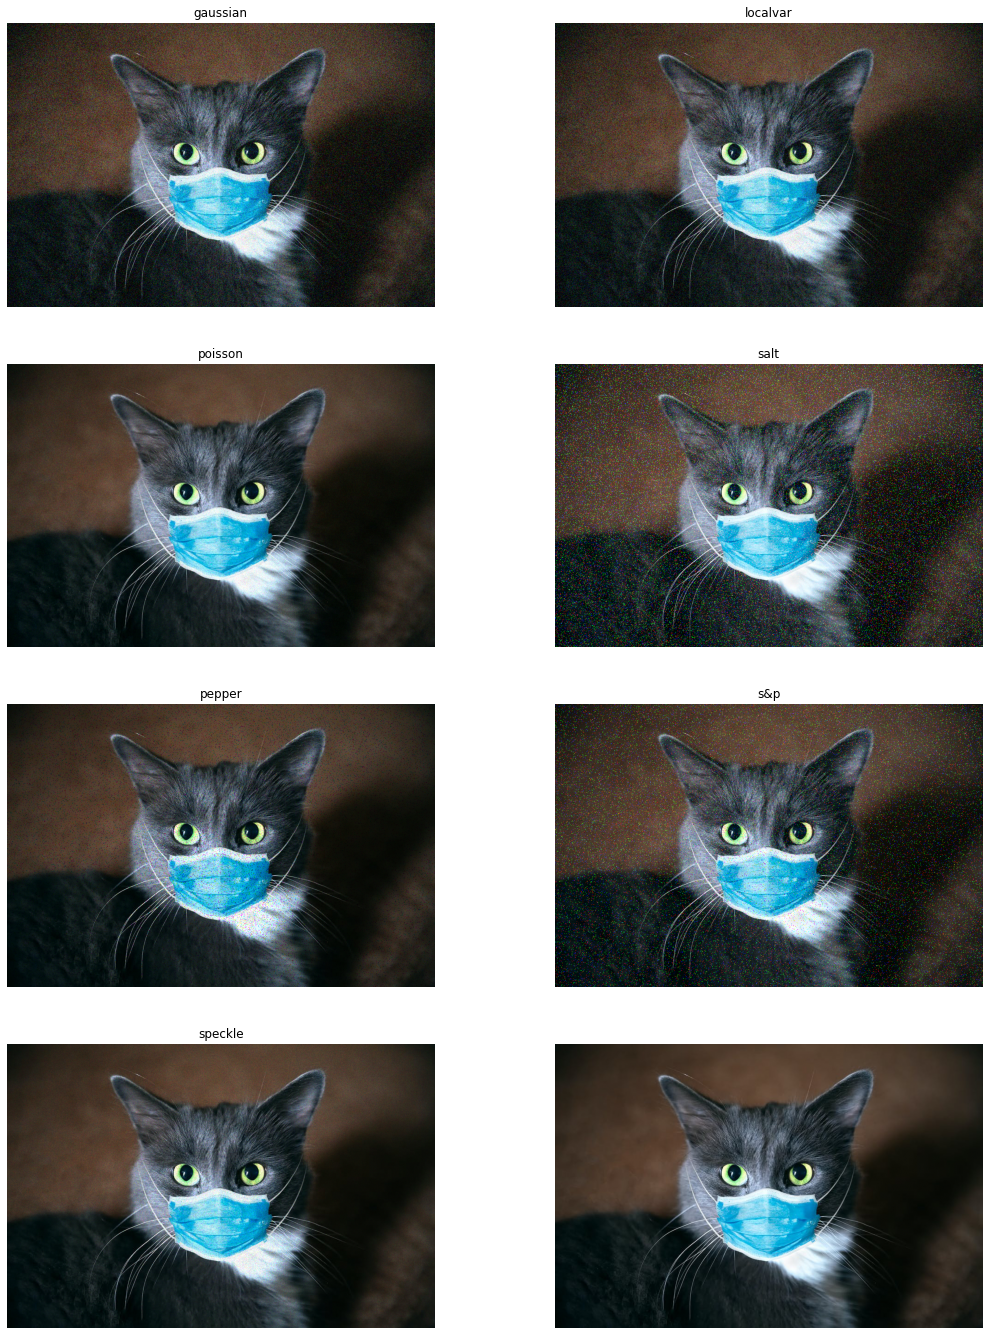

In [13]:
import skimage.io
img_path="pictures/coronacat.jpg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img, None, r,c,8)
plt.show()


On va choisit le type de bruit "salt" dans le reste de TP

True

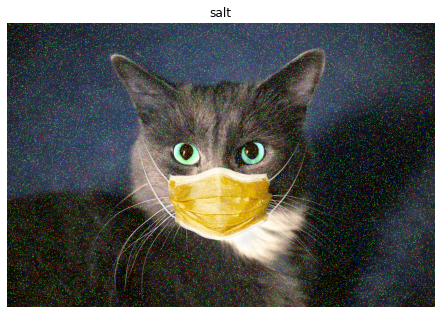

In [14]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt
import skimage.io

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
        plt.imsave('pictures/saltCat.jpg',gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")


image = cv2.imread('pictures/coronacat.jpg')
#img = skimage.io.imread('/root/Downloads/coronacat.jpg')/255.0

(h1, w1) = image.shape[:2]

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters = 3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))

plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(image, "salt", r,c,4)

cv2.imwrite('pictures/salt_3.jpg', quant)



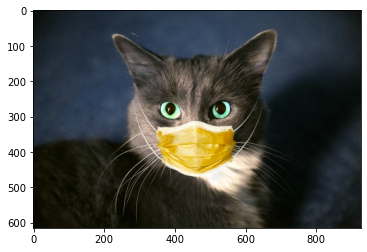

In [15]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('pictures/coronacat.jpg')
(h1, w1) = image.shape[:2]

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = KMeans(n_clusters =3)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))


cv2.imwrite('pictures/original_3.jpg', quant)
plt.imshow(image)


Après un test entre deux images, l'une est bruité et l'autre est l'image original, on démontre qu'après plusieur essais que l'image bruité est moins proche de l'image original que limage n'est pas bruité, mais cette différance n'est pas visible avec deux clusters par contre il est visible a partir 3 clusters est plus, est chaque fois le nombre augmantes, la différance augmante aussi.

#### On a choisit un algorithme de filtrage qui s'appelle "Median filtre"

In [16]:
import numpy
from PIL import Image
import matplotlib.pyplot as plt
import cv2

def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = numpy.zeros((len(data),len(data[0])))
    for i in range(len(data)):

        for j in range(len(data[0])):

            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final


def main():
    img = Image.open("pictures/saltCat.jpg").convert(
        "L")
    arr = numpy.array(img)
    removed_noise = median_filter(arr, 3) 
    img = Image.fromarray(removed_noise)
    img.show()
    plt.imsave('pictures/saltCatFiltred.jpg', img)
    
    image = cv2.imread('pictures/saltCatFiltred.jpg')
    (h1, w1) = image.shape[:2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    image = image.reshape((image.shape[0] * image.shape[1], 3))
    
    clt = KMeans(n_clusters = 5)

    labels = clt.fit_predict(image)
    quant = clt.cluster_centers_.astype("uint8")[labels]
    
    #reshape the feature vectors to images
    quant = quant.reshape((h1, w1, 3))
    image = image.reshape((h1, w1, 3))
    # convert from L*a*b* to RGB
    quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
    image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
    
    cv2.imwrite('pictures/saltCatFiltred_5.jpg', quant)   

main()

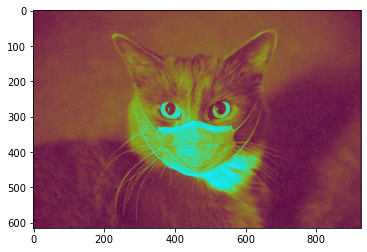

In [17]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import skimage.io
import matplotlib.pyplot as plt

image = cv2.imread('pictures/saltCatFiltred.jpg')
(h1, w1) = image.shape[:2]
image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
image = image.reshape((image.shape[0] * image.shape[1], 3))
    
clt = KMeans(n_clusters = 20)

labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]
    
#reshape the feature vectors to images
quant = quant.reshape((h1, w1, 3))
image = image.reshape((h1, w1, 3))
# convert from L*a*b* to RGB
quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)
    
cv2.imwrite('pictures/saltCatFiltred_20.jpg', quant)   
plt.imshow(image)
cv2.imread('pictures/saltCatFiltred.jpg')
cv2.waitKey(0)
cv2.destroyAllWindows()

Après une filtrage de bruit on remarque que la photo filtré est plus proche a la photo original que la photo bruité, mais cette différance n'est remarquable qu'aprés affecter un nombre grand de clusters

In [27]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p numpy,sklearn,matplotlib,skimage,PIL,cv2,watermark 

# date
print (" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.8.3
IPython 7.16.1

numpy 1.18.5
sklearn 0.23.1
matplotlib 3.2.2
skimage 0.16.2
PIL 7.2.0
cv2 4.4.0
watermark 2.0.2

compiler   : GCC 7.3.0
system     : Linux
release    : 4.13.0-kali1-amd64
machine    : x86_64
processor  : 
CPU cores  : 4
interpreter: 64bit
 
last updated: Sat Oct 31 2020 02:14:38 CET
